# Mini-Project: Advanced Statistical Analysis of Apple Inc. Stock Data

1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing

## 1. Data Loading and Exploration

First, import the pertinent libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set_theme()

Now I can import the data.

In [2]:
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


What do these columns mean?

Time: The date for which the stock data is recorded (in Unix timestamp format).\
Open: The price of the stock when the market opens on a given day.\
High: The highest price reached by the stock during the day.\
Low: The lowest price reached by the stock during the day.\
Close: The final price of the stock at the end of the trading day.\
Volume: The total number of shares traded during the day.\
VWAP (Volume Weighted Average Price): The average price of the stock, weighted by the volume traded at different prices during the day.\
Number of Transactions: The total count of transactions (trades) that occurred on that day.

First, for convinience, I will add a 'datetime' column and delete time:

In [3]:
df['datetime'] = pd.to_datetime(df['time'], unit = 's')
del df['time']

I'm going to check for empty values and NaNs:

In [4]:
df.isnull().sum(), df.isna().sum()

(volume          0
 vwap            0
 open            0
 close           0
 high            0
 low             0
 transactions    0
 datetime        0
 dtype: int64,
 volume          0
 vwap            0
 open            0
 close           0
 high            0
 low             0
 transactions    0
 datetime        0
 dtype: int64)

There are none. It is also important to note that all values are numerical, and that makes the analysis easier.

## 2. Data Visualization

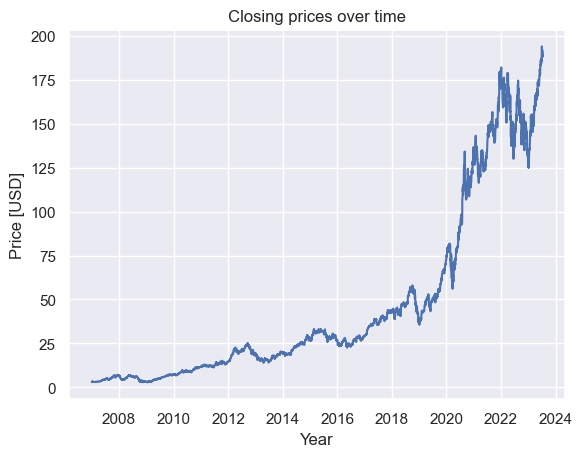

In [5]:
sns.lineplot(df, x = 'datetime', y = 'close')
plt.title("Closing prices over time")
plt.xlabel("Year")
plt.ylabel("Price [USD]")
plt.show()

Closing prices over time has increased pretty consistently over time. Apple is nowadays a very successful company.

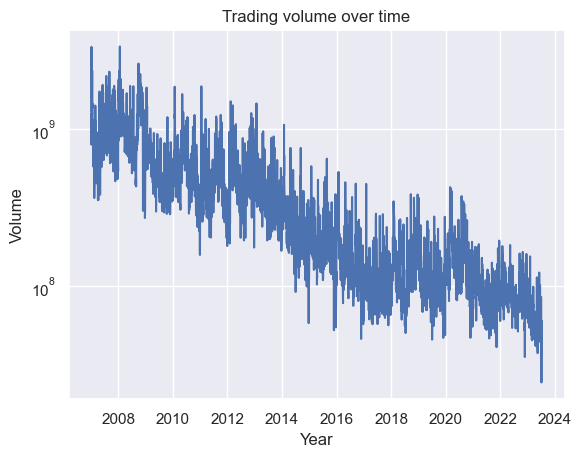

In [6]:
sns.lineplot(df, x = 'datetime', y = 'volume')
plt.title("Trading volume over time")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.yscale('log')
plt.show()

The trading volume has been decreasing in a logarithmic rate. At first sight, this seems contradictory with the plot of closing price over time, however, this is a common event in stocks that grow. When a stock price goes up, people can buy less shares with the same amount of money. That results in lower trading volume but still more buyers than sellers.

In [7]:
import mplfinance as mpf

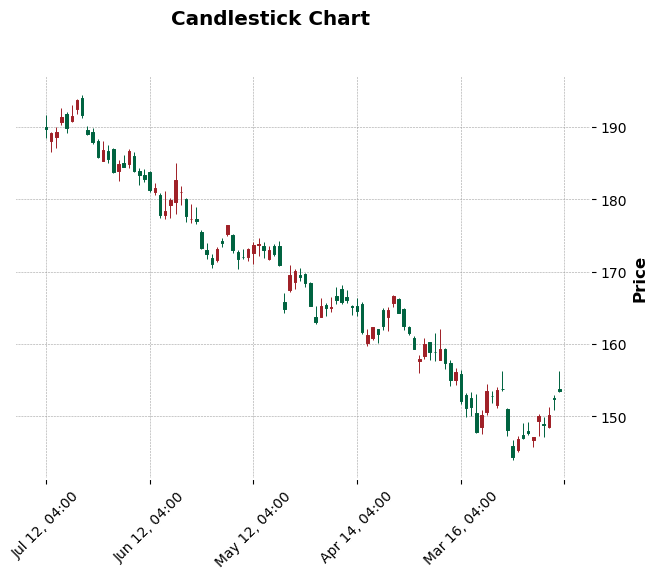

In [8]:
# Take only the last 100 transactions
df_sorted = df.sort_values(by = 'datetime', ascending = False).head(100)
df_sorted.set_index('datetime', inplace=True)

# Select only the necessary columns for the candlestick chart
df_candlestick = df_sorted[['open', 'high', 'low', 'close']]

# Plot 
mpf.plot(df_candlestick, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

## 3. Statistical Analysis

- Compute summary statistics (mean, median, standard deviation) for key columns.
- Analyze closing prices with a moving average.


Let's analyze the dataframe:

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,4159.0,3.662925e+08,3.724793e+08,2.422234e+07,1.067497e+08,2.136463e+08,4.965321e+08,3.373042e+09
vwap,4159.0,4.639138e+01,5.027756e+01,2.841000e+00,1.193620e+01,2.588520e+01,5.215415e+01,1.931020e+02
open,4159.0,4.636279e+01,5.023559e+01,2.835400e+00,1.195570e+01,2.577500e+01,5.226375e+01,1.937800e+02
close,4159.0,4.639606e+01,5.029348e+01,2.792900e+00,1.194715e+01,2.582500e+01,5.223125e+01,1.939700e+02
high,4159.0,4.688113e+01,5.084387e+01,2.928600e+00,1.202840e+01,2.626280e+01,5.262625e+01,1.944800e+02
low,4159.0,4.586579e+01,4.968010e+01,2.792900e+00,1.185360e+01,2.568000e+01,5.179625e+01,1.917600e+02
transactions,4159.0,2.709318e+05,2.510859e+05,3.048700e+04,1.128150e+05,1.782460e+05,3.259555e+05,2.966979e+06


In [10]:
for col in df.describe().columns:
    mean = int(df.describe()[col]["mean"])
    std = int(df.describe()[col]["std"])
    median = int(df.describe()[col]["50%"])
    print(f"{col.upper()} -  mean: {mean} +/- {std}, median: {median}")

VOLUME -  mean: 366292450 +/- 372479281, median: 213646276
VWAP -  mean: 46 +/- 50, median: 25
OPEN -  mean: 46 +/- 50, median: 25
CLOSE -  mean: 46 +/- 50, median: 25
HIGH -  mean: 46 +/- 50, median: 26
LOW -  mean: 45 +/- 49, median: 25
TRANSACTIONS -  mean: 270931 +/- 251085, median: 178246


We need to analyze the Simple Moving Average (SMA). It calculates the average of a given subset of data over a specific period. 

Formula for SMA:
$$\text{SMA}_n= \frac{\text{Sum of closing prices over the last } n \text{ periods}}{n}$$

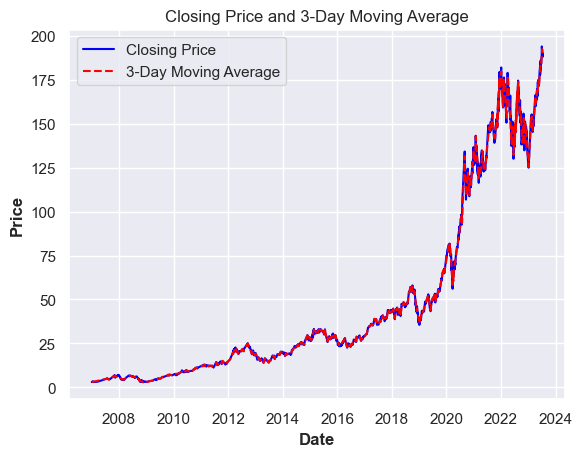

In [11]:
sns.set_theme()
df.set_index('datetime', inplace=True)
# 3-day Simple Moving Average 
df['SMA_3'] = df['close'].rolling(window=3).mean()

plt.plot(df['close'], label='Closing Price', color='blue')
plt.plot(df['SMA_3'], label='3-Day Moving Average', color='red', linestyle='--')
plt.title('Closing Price and 3-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## 4. Hypothesis Testing


- Execute a t-test to compare average closing prices across different years.
- Examine daily returns’ distribution and test for normality using SciPy.


First, I need to group closing prices in years:

In [12]:
df['year'] = df.index.year
df_grouped = df.groupby('year')['close'].apply(list)

This way is easy to access all the closing prices from each particular year.

In [13]:
t_stat, p_value = stats.ttest_ind(df_grouped[2020], df_grouped[2022])
print(f"T-test for the means of two independent samples of scores: {t_stat}, p-value: {p_value}")

T-test for the means of two independent samples of scores: -37.116003392770985, p-value: 5.068403015943744e-146


In [14]:
n1, n2 = len(df_grouped[2020]), len(df_grouped[2022])
DF = n1 + n2 -2

alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, DF)


print("Critical Value:", critical_value)

Critical Value: 1.9647008448830137


t-stats >> critical value & p-value << 0.05 => the two mean values are significantly different

Now we need to examine daily returns's distribution.
A daily return is the percentage change in the price of an asset between two consecutive trading days. 

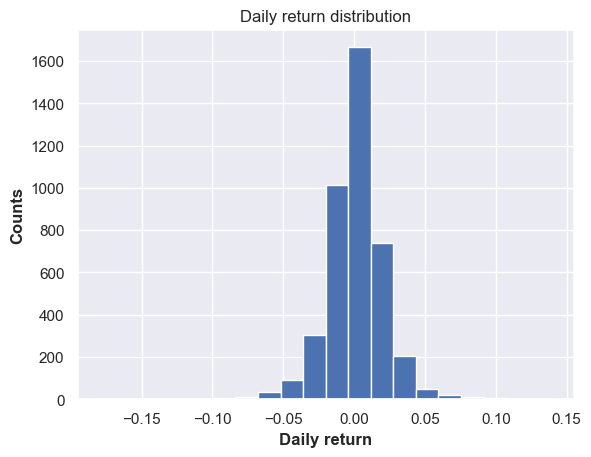

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [15]:
df['daily_return'] = df['close'].pct_change()
plt.hist(df['daily_return'], bins = 20)
plt.xlabel('Daily return')
plt.ylabel('Counts')
plt.title('Daily return distribution')
x = np.linspace(np.mean(df['daily_return']) - 3*np.std(df['daily_return']) , np.mean(df['daily_return'])  + 3*np.std(df['daily_return']) , 100)
#plt.plot(x, 80*stats.norm.pdf(x, np.mean(df['daily_return']) , np.std(df['daily_return']) ))
plt.show()
plt.plot

Now I want to test this distribution for normality, aka., if it follows a normal distribution. For that, I'll use a specific test called _"Shapiro-Wilk test for normality"_ :

In [16]:
stat, p_value = stats.shapiro(df['daily_return'].dropna())
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")
#H0: the data was drawn from a normal distribution
#H1: the data was not drawn from a normal distribution
if p_value < 0.05:
    print("We reject the null hypothesis that it is a normal dist. It's not a normal dist.")
else:
    print("It seems to follow a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9406670928001404, p-value: 6.184222153665383e-38
We reject the null hypothesis that it is a normal dist. It's not a normal dist.


This is strange because it looks pretty normal to me, but math doesn't lie. According to this test, this is not a normal distribution.

This project explores historical stock data for Apple Inc., applying statistical analysis to uncover patterns and trends. The analysis indicates that Apple Inc.'s stock price has shown significant growth over the years, with notable fluctuations during major market events.
